## Breakout Atari 2600

Maximice su puntuación en el juego Breakout de Atari 2600. En este entorno, la observación es una imagen RGB de la pantalla, que es una matriz de formas (210, 160, 3). Cada acción se realiza repetidamente durante una duración de k frames, donde k se muestrea uniformemente desde {2,3,4}.

El juego se simula a través del Arcade Learning Environment [ALE], que utiliza el emulador Stella [Stella] Atari.

<img src="https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/Breakout-v0/poster.jpg" />

Esta semana aprenderemos a utilizar la libreria TF-Agents de tensorflow para programar nuestros agentes inteligentes. la libreia TF agents contiene wrappers, que le permiten ejecutar en diferentes ambientes, como los juegos emulados de atari de Gym o bien los ML agents de Unity.

Hoy entrenaremos el algoritmo DQN que revisamos la semana aterior, algoritmo parametrizado que puede ser cambiado por otro en el codigo fuente.

In [47]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

#!conda install -c conda-forge gym
import gym

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

#!pip install tf-agents

### Ambiente Breakout-v4

In [3]:
from tf_agents.environments import suite_gym

env = suite_gym.load("Breakout-v4")
env

# el env es un wrapper del ambiente de Open AI Gym

In [50]:
env.seed(42)
env.reset()

# tanto reset como step devuelven un objeto tipo TimeStep

TimeStep(step_type=array(0), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]

In [5]:
env.step(1) # moverse

# step_type
# - es 0 para el primer step
# - es 1 para cualqueir step n-1
# - es 2 para el step final 

# discount - es el discount factor

TimeStep(step_type=array(1), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8))

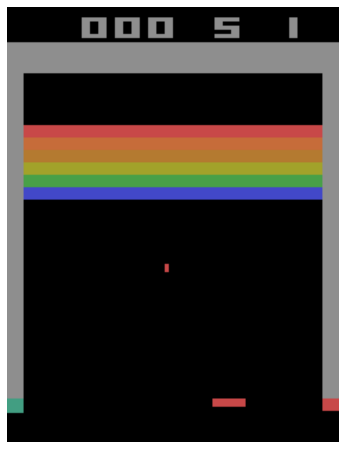

In [6]:
# deplegamos el ambiente usando matplotlib.
img = env.render(mode="rgb_array")

plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

In [51]:
# current_time_step
# - este metodo puede ser llamado en cualquier momento y nos devuelve el estado del step actual.

env.current_time_step()

TimeStep(step_type=array(0), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]

### Especifricaciones del Ambiente

In [8]:
# informacion del ambiente observado
env.observation_spec()

BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255)

In [52]:
# informacion de las acciones. (esto no es super util)
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=3)

In [53]:
# esto nos da mas detalle de que significa ese rango de [0,3]
env.gym.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [10]:
# toda la infromacion condesada de la observacion actual
env.time_step_spec()

TimeStep(step_type=ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'), reward=ArraySpec(shape=(), dtype=dtype('float32'), name='reward'), discount=BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0), observation=BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255))

### Environment Wrappers

TF-Agents ya trae unos wrappers que permiten capturar ambientes y brindar funcionalidad extra que puede facilitar ciertas ejecuciones.

In [55]:
# ActionRepeat
# - Repite acciones y pasos mientras acumula la recompensa recibida. 

from tf_agents.environments.wrappers import ActionRepeat

# recuerde que: env = suite_gym.load("Breakout-v4")
# este wrapper repite las acciones 4 veces
repeating_env = ActionRepeat(env, times=4)
repeating_env

In [56]:
# devuelve el ambiente original en caso de que lo ocupemos
repeating_env.unwrapped

In [57]:
# Wrappers Disponibles

import tf_agents.environments.wrappers

for name in dir(tf_agents.environments.wrappers):
    obj = getattr(tf_agents.environments.wrappers, name)
    if hasattr(obj, "__base__") and issubclass(obj, tf_agents.environments.wrappers.PyEnvironmentBaseWrapper):
        print("{:27s} {}".format(name, obj.__doc__.split("\n")[0]))

ActionClipWrapper           Wraps an environment and clips actions to spec before applying.
ActionDiscretizeWrapper     Wraps an environment with continuous actions and discretizes them.
ActionOffsetWrapper         Offsets actions to be zero-based.
ActionRepeat                Repeates actions over n-steps while acummulating the received reward.
FlattenObservationsWrapper  Wraps an environment and flattens nested multi-dimensional observations.
GoalReplayEnvWrapper        Adds a goal to the observation, used for HER (Hindsight Experience Replay).
HistoryWrapper              Adds observation and action history to the environment's observations.
ObservationFilterWrapper    Filters observations based on an array of indexes.
OneHotActionWrapper         Converts discrete action to one_hot format.
PerformanceProfiler         End episodes after specified number of steps.
PyEnvironmentBaseWrapper    PyEnvironment wrapper forwards calls to the given environment.
RunStats                    Wrapp

In [59]:
# suite_gym.load:
# - de forma alternativa, esta funcion puede crear el ambiente y utilizar varios wrappers al mismo tiempo

from functools import partial
from gym.wrappers import TimeLimit

limited_repeating_env = suite_gym.load(
    "Breakout-v4",
    gym_env_wrappers=[partial(TimeLimit, max_episode_steps=10000)],
    env_wrappers=[partial(ActionRepeat, times=4)],
)

In [60]:
limited_repeating_env

In [61]:
limited_repeating_env.unwrapped

# Reinforcement Learning Breakout Atari 2600

## 1 - Preparar el Ambiente

Vamos a crear una clase AtariPreprocessingWithAutoFire ya que el juego ocupa disparar en el primer frame para iniciar el juego, asi que apenas se haga reset, este inicial el juego con una accion Fire.

El ambiente a usar es **"BreakoutNoFrameskip-v4"** ya que este no usa max polling ni frame skipping.

In [17]:
from tf_agents.environments import suite_atari
from tf_agents.environments.atari_preprocessing import AtariPreprocessing
from tf_agents.environments.atari_wrappers import FrameStack4 # Stack 4 frames previos

max_episode_steps = 27000 # <=> 108k ALE frames ya que 1 step = 4 frames
environment_name = "BreakoutNoFrameskip-v4"

class AtariPreprocessingWithAutoFire(AtariPreprocessing):
    def reset(self, **kwargs):
        obs = super().reset(**kwargs)
        super().step(1) # Start
        return obs
    def step(self, action):
        lives_before_action = self.ale.lives()
        obs, rewards, done, info = super().step(action)
        if self.ale.lives() < lives_before_action and not done:
            super().step(1) # Auto Start si hay una muerte. (se pifea la bolita)
        return obs, rewards, done, info

# vamos a crear el ambiente con 2 wrappers, uno custom, y otro llamado FrameStack4   
env = suite_atari.load(
    environment_name,
    max_episode_steps=max_episode_steps,
    gym_env_wrappers=[AtariPreprocessingWithAutoFire, FrameStack4])

In [66]:
# vamos a probar nuestro ambiente y vamos a ejecutar 3 movimientos hacia la izquiera.
env.seed(42)
env.reset()
for _ in range(4):
    time_step = env.step(3) # IZQUIERDA o LEFT

In [67]:
def plot_observation(obs):
    # Dado que solo hay 3 canales de color, no puede mostrar 4 cuadros
    # con un color primario por cuadro. Entonces este código calcula el delta entre
    # el fotograma actual y la media de los otros fotogramas, y agrega este delta
    # a los canales rojo y azul para obtener un color rosa para el cuadro actual.
    obs = obs.astype(np.float32)
    img = obs[..., :3]
    current_frame_delta = np.maximum(obs[..., 3] - obs[..., :3].mean(axis=-1), 0.)
    img[..., 0] += current_frame_delta
    img[..., 2] += current_frame_delta
    img = np.clip(img / 150, 0, 1)
    plt.imshow(img)
    plt.axis("off")

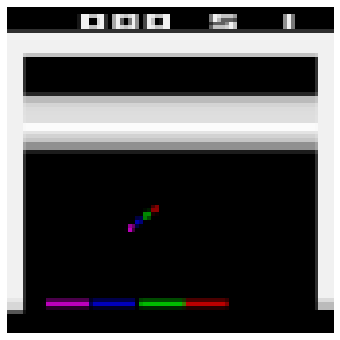

In [68]:
plt.figure(figsize=(6, 6))
plot_observation(time_step.observation)
plt.show()

In [69]:
# vamos a convertir el ambiente actual en un ambiente de Tensorflow (como un grafo de tensorflow).

from tf_agents.environments.tf_py_environment import TFPyEnvironment

tf_env = TFPyEnvironment(env)

### DQN

Vamos a crear una clase pequeña para normalizar las observaciones. Las imágenes se almacenan usando bytes de 0 a 255 para usar menos RAM, pero queremos pasar flotantes de 0.0 a 1.0 a la red neuronal:

In [70]:
from tf_agents.networks.q_network import QNetwork

# normaliza 0.0 a 1.0
preprocessing_layer = keras.layers.Lambda(
                          lambda obs: tf.cast(obs, np.float32) / 255.)

# capas connvoluciuonales con los filtros a utilizar
conv_layer_params=[(32, (8, 8), 4), (64, (4, 4), 2), (64, (3, 3), 1)]

# capa Dense(512) despues salen 4 valores de output (Q-Values)
fc_layer_params=[512]

# Deep Q-Network (Q-Learning)
# esta red devuelve 1 Q-Value por cada accion. (recordemos son 4)
q_net = QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(), # 4 acciones
    preprocessing_layers=preprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params)

### Definicion el Agente (DQN-Agent)

Los TF Agents normalmente se separan en 2 partes que se ejecutan de forma paralela. Primero el diver recolecta informacion del ambienten utilizando una politica que recolecta experiencias (trayectorias, etc) y las manda a un observador (observer) el cual agrega al informacion en un Replay Buffer.

En el otro lado, el agente recolecta la informacion del Replay Buffer en batches y entrena un modelo para realizar la prediccion (en nuestro caso usando el DQN). 

La siguiente imagen muestra esta arquitectura:

<img src="img/rl1.jpeg" />

### Definicion del DqnAgent

In [23]:
from tf_agents.agents.dqn.dqn_agent import DqnAgent

train_step = tf.Variable(0)
update_period = 4 # un training step recolecta 4 pasos
optimizer = keras.optimizers.RMSprop(lr=2.5e-4, rho=0.95, momentum=0.0,
                                     epsilon=0.00001, centered=True)

# funcion que calcula e y e-greedy
epsilon_fn = keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1.0, # initial ε
    decay_steps=250000 // update_period, # <=> 1,000,000 ALE frames
    end_learning_rate=0.01) # final ε

# el agente con la DQN creada y todos los parametros necesarios
agent = DqnAgent(tf_env.time_step_spec(),
                 tf_env.action_spec(),
                 q_network=q_net,
                 optimizer=optimizer,
                 target_update_period=2000, # <=> 32,000 ALE frames
                 td_errors_loss_fn=keras.losses.Huber(reduction="none"),
                 gamma=0.99, # factor de descuento
                 train_step_counter=train_step,
                 epsilon_greedy=lambda: epsilon_fn(train_step))

# se inicializa el agente
agent.initialize()

### Creamos el Replay Buffer

In [24]:
from tf_agents.replay_buffers import tf_uniform_replay_buffer

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=100000) # reducir si da Out-of-Memory Error (OOM)

### Creamos el Observador

In [71]:
replay_buffer_observer = replay_buffer.add_batch

### Funciones Utilitarias

In [72]:
class ShowProgress:
    def __init__(self, total):
        self.counter = 0
        self.total = total
    def __call__(self, trajectory):
        if not trajectory.is_boundary():
            self.counter += 1
        if self.counter % 100 == 0:
            print("\r{}/{}".format(self.counter, self.total), end="")

In [73]:
from tf_agents.metrics import tf_metrics

train_metrics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(),
    tf_metrics.AverageEpisodeLengthMetric(),
]

train_metrics[0].result()

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [74]:
from tf_agents.eval.metric_utils import log_metrics
import logging
logging.getLogger().setLevel(logging.INFO)
log_metrics(train_metrics)

INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 0
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


### Creamos el Driver

In [28]:
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver

collect_driver = DynamicStepDriver(
    tf_env,
    agent.collect_policy,
    observers=[replay_buffer_observer] + train_metrics,
    num_steps=update_period) # recolecte 4

### Creamos El Collect Policy

El collect driver es quien explora el ambiente, dada unas politicas y luego manda esta informacion al observer, quien luego pasa esa informacion al Replay Buffer.

In [29]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

initial_collect_policy = RandomTFPolicy(tf_env.time_step_spec(),
                                        tf_env.action_spec())
# DynamicStepDriver
# -  recolecta experiencias cada n numero de steps

init_driver = DynamicStepDriver(
    tf_env,
    initial_collect_policy,
    observers=[replay_buffer.add_batch, ShowProgress(20000)],
    num_steps=20000) # <=> 80,000 ALE frames

# ejecutamos el Collect Policy
final_time_step, final_policy_state = init_driver.run()

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


20000/20000

### Crear el DataSet

#### exploremos un momento el replay_buffer

In [30]:
# Vamos a convertir el Replay Buffer en un dataset utilizable que contiene la experiencia recolectada a la cual le llamaremos
# trayectorias.

tf.random.set_seed(9)

trajectories, buffer_info = next(iter(replay_buffer.as_dataset(
    sample_batch_size=2,
    num_steps=3,
    single_deterministic_pass=False)))

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [31]:
# estos son los campos de cada trayectoria
trajectories._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [32]:
trajectories.observation.shape

TensorShape([2, 3, 84, 84, 4])

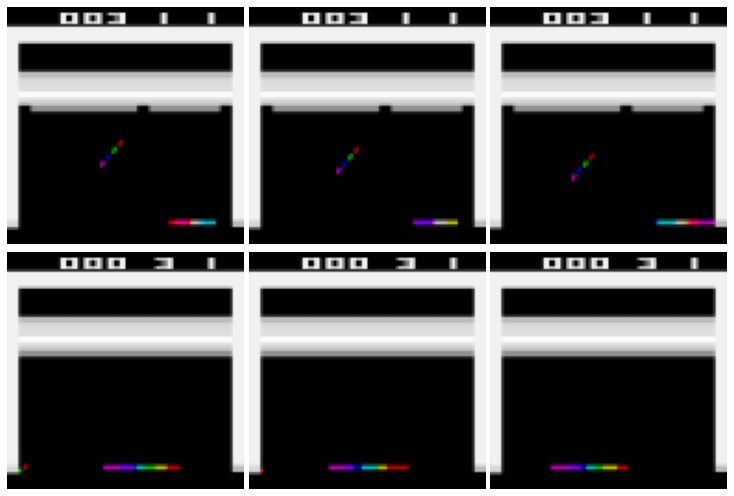

In [75]:
# vamos a deplegar los frames capturados en algunas trayectorias del dataset

plt.figure(figsize=(10, 6.8))
for row in range(2):
    for col in range(3):
        plt.subplot(2, 3, row * 3 + col + 1)
        plot_observation(trajectories.observation[row, col].numpy())
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0.02)
plt.show()

#### Creamos el Dataset (del replay buffer)

In [36]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
    num_parallel_calls=3).prefetch(3) # pre-carga 3 batches

In [37]:
# algunos wraps con function para usar en el main loop...
from tf_agents.utils.common import function

collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

### Main Loop (Entrenamiento del Agente)

In [38]:
def train_agent(n_iterations):
    time_step = None
    policy_state = agent.collect_policy.get_initial_state(tf_env.batch_size)
    iterator = iter(dataset)
    for iteration in range(n_iterations):
        time_step, policy_state = collect_driver.run(time_step, policy_state)
        trajectories, buffer_info = next(iterator)
        train_loss = agent.train(trajectories)
        print("\r{} loss:{:.5f}".format(
            iteration, train_loss.loss.numpy()), end="")
        if iteration % 1000 == 0:
            log_metrics(train_metrics)
            
train_agent(n_iterations=50000) # que tal 10,000,000 ? mejor que un humano? intentelo....

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 4
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


999 loss:0.00013

INFO:absl: 
		 NumberOfEpisodes = 27
		 EnvironmentSteps = 4004
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 138.10000610351562


1998 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 53
		 EnvironmentSteps = 8004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 157.8000030517578


2999 loss:0.00014

INFO:absl: 
		 NumberOfEpisodes = 80
		 EnvironmentSteps = 12004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 164.0


3997 loss:0.00847

INFO:absl: 
		 NumberOfEpisodes = 102
		 EnvironmentSteps = 16004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 179.10000610351562


4997 loss:0.00009

INFO:absl: 
		 NumberOfEpisodes = 129
		 EnvironmentSteps = 20004
		 AverageReturn = 0.5
		 AverageEpisodeLength = 139.10000610351562


5996 loss:0.00005

INFO:absl: 
		 NumberOfEpisodes = 156
		 EnvironmentSteps = 24004
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 154.10000610351562


6998 loss:0.00057

INFO:absl: 
		 NumberOfEpisodes = 184
		 EnvironmentSteps = 28004
		 AverageReturn = 0.30000001192092896
		 AverageEpisodeLength = 131.0


7995 loss:0.00058

INFO:absl: 
		 NumberOfEpisodes = 208
		 EnvironmentSteps = 32004
		 AverageReturn = 1.5
		 AverageEpisodeLength = 180.89999389648438


8999 loss:0.00011

INFO:absl: 
		 NumberOfEpisodes = 232
		 EnvironmentSteps = 36004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 159.6999969482422


9998 loss:0.00010

INFO:absl: 
		 NumberOfEpisodes = 255
		 EnvironmentSteps = 40004
		 AverageReturn = 1.899999976158142
		 AverageEpisodeLength = 188.10000610351562


10999 loss:0.00004

INFO:absl: 
		 NumberOfEpisodes = 280
		 EnvironmentSteps = 44004
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 163.5


12000 loss:0.00006

INFO:absl: 
		 NumberOfEpisodes = 304
		 EnvironmentSteps = 48004
		 AverageReturn = 0.800000011920929
		 AverageEpisodeLength = 153.0


13000 loss:0.00031

INFO:absl: 
		 NumberOfEpisodes = 327
		 EnvironmentSteps = 52004
		 AverageReturn = 2.200000047683716
		 AverageEpisodeLength = 207.3000030517578


13995 loss:0.00005

INFO:absl: 
		 NumberOfEpisodes = 352
		 EnvironmentSteps = 56004
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 151.10000610351562


14996 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 376
		 EnvironmentSteps = 60004
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 164.1999969482422


15998 loss:0.00037

INFO:absl: 
		 NumberOfEpisodes = 398
		 EnvironmentSteps = 64004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 167.60000610351562


17000 loss:0.00010

INFO:absl: 
		 NumberOfEpisodes = 424
		 EnvironmentSteps = 68004
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 143.39999389648438


18000 loss:0.00019

INFO:absl: 
		 NumberOfEpisodes = 444
		 EnvironmentSteps = 72004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 168.3000030517578


18999 loss:0.00187

INFO:absl: 
		 NumberOfEpisodes = 466
		 EnvironmentSteps = 76004
		 AverageReturn = 1.5
		 AverageEpisodeLength = 173.60000610351562


19997 loss:0.00034

INFO:absl: 
		 NumberOfEpisodes = 488
		 EnvironmentSteps = 80004
		 AverageReturn = 2.299999952316284
		 AverageEpisodeLength = 185.10000610351562


21000 loss:0.00065

INFO:absl: 
		 NumberOfEpisodes = 510
		 EnvironmentSteps = 84004
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 175.39999389648438


21997 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 529
		 EnvironmentSteps = 88004
		 AverageReturn = 2.700000047683716
		 AverageEpisodeLength = 218.60000610351562


22998 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 549
		 EnvironmentSteps = 92004
		 AverageReturn = 2.9000000953674316
		 AverageEpisodeLength = 220.60000610351562


23997 loss:0.00004

INFO:absl: 
		 NumberOfEpisodes = 570
		 EnvironmentSteps = 96004
		 AverageReturn = 2.200000047683716
		 AverageEpisodeLength = 202.5


24997 loss:0.00010

INFO:absl: 
		 NumberOfEpisodes = 592
		 EnvironmentSteps = 100004
		 AverageReturn = 1.7000000476837158
		 AverageEpisodeLength = 174.0


25996 loss:0.00019

INFO:absl: 
		 NumberOfEpisodes = 615
		 EnvironmentSteps = 104004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 156.39999389648438


26996 loss:0.00016

INFO:absl: 
		 NumberOfEpisodes = 639
		 EnvironmentSteps = 108004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 154.0


27999 loss:0.00050

INFO:absl: 
		 NumberOfEpisodes = 664
		 EnvironmentSteps = 112004
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 168.8000030517578


28997 loss:0.00039

INFO:absl: 
		 NumberOfEpisodes = 686
		 EnvironmentSteps = 116004
		 AverageReturn = 1.5
		 AverageEpisodeLength = 169.0


29999 loss:0.00012

INFO:absl: 
		 NumberOfEpisodes = 706
		 EnvironmentSteps = 120004
		 AverageReturn = 2.4000000953674316
		 AverageEpisodeLength = 207.0


30998 loss:0.00045

INFO:absl: 
		 NumberOfEpisodes = 727
		 EnvironmentSteps = 124004
		 AverageReturn = 2.0999999046325684
		 AverageEpisodeLength = 192.60000610351562


32000 loss:0.00401

INFO:absl: 
		 NumberOfEpisodes = 748
		 EnvironmentSteps = 128004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 168.1999969482422


32997 loss:0.00096

INFO:absl: 
		 NumberOfEpisodes = 768
		 EnvironmentSteps = 132004
		 AverageReturn = 2.0999999046325684
		 AverageEpisodeLength = 194.5


34000 loss:0.00356

INFO:absl: 
		 NumberOfEpisodes = 790
		 EnvironmentSteps = 136004
		 AverageReturn = 2.0999999046325684
		 AverageEpisodeLength = 191.5


34998 loss:0.00177

INFO:absl: 
		 NumberOfEpisodes = 809
		 EnvironmentSteps = 140004
		 AverageReturn = 2.799999952316284
		 AverageEpisodeLength = 201.5


35998 loss:0.00147

INFO:absl: 
		 NumberOfEpisodes = 827
		 EnvironmentSteps = 144004
		 AverageReturn = 3.0999999046325684
		 AverageEpisodeLength = 227.39999389648438


36998 loss:0.00046

INFO:absl: 
		 NumberOfEpisodes = 845
		 EnvironmentSteps = 148004
		 AverageReturn = 3.5
		 AverageEpisodeLength = 212.5


37996 loss:0.00046

INFO:absl: 
		 NumberOfEpisodes = 863
		 EnvironmentSteps = 152004
		 AverageReturn = 3.5
		 AverageEpisodeLength = 211.6999969482422


38997 loss:0.00039

INFO:absl: 
		 NumberOfEpisodes = 881
		 EnvironmentSteps = 156004
		 AverageReturn = 3.9000000953674316
		 AverageEpisodeLength = 226.6999969482422


39997 loss:0.00039

INFO:absl: 
		 NumberOfEpisodes = 899
		 EnvironmentSteps = 160004
		 AverageReturn = 2.9000000953674316
		 AverageEpisodeLength = 204.89999389648438


40997 loss:0.00040

INFO:absl: 
		 NumberOfEpisodes = 917
		 EnvironmentSteps = 164004
		 AverageReturn = 4.099999904632568
		 AverageEpisodeLength = 229.89999389648438


42000 loss:0.00834

INFO:absl: 
		 NumberOfEpisodes = 935
		 EnvironmentSteps = 168004
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 231.5


42997 loss:0.00067

INFO:absl: 
		 NumberOfEpisodes = 951
		 EnvironmentSteps = 172004
		 AverageReturn = 4.199999809265137
		 AverageEpisodeLength = 235.1999969482422


43997 loss:0.00076

INFO:absl: 
		 NumberOfEpisodes = 968
		 EnvironmentSteps = 176004
		 AverageReturn = 4.099999904632568
		 AverageEpisodeLength = 230.60000610351562


45000 loss:0.00025

INFO:absl: 
		 NumberOfEpisodes = 983
		 EnvironmentSteps = 180004
		 AverageReturn = 5.900000095367432
		 AverageEpisodeLength = 277.79998779296875


45999 loss:0.00109

INFO:absl: 
		 NumberOfEpisodes = 998
		 EnvironmentSteps = 184004
		 AverageReturn = 6.0
		 AverageEpisodeLength = 295.8999938964844


46997 loss:0.00098

INFO:absl: 
		 NumberOfEpisodes = 1012
		 EnvironmentSteps = 188004
		 AverageReturn = 4.900000095367432
		 AverageEpisodeLength = 274.70001220703125


47997 loss:0.00076

INFO:absl: 
		 NumberOfEpisodes = 1026
		 EnvironmentSteps = 192004
		 AverageReturn = 5.199999809265137
		 AverageEpisodeLength = 299.20001220703125


48995 loss:0.00060

INFO:absl: 
		 NumberOfEpisodes = 1038
		 EnvironmentSteps = 196004
		 AverageReturn = 9.300000190734863
		 AverageEpisodeLength = 319.70001220703125


49999 loss:0.00043

In [39]:
from matplotlib.animation import FuncAnimation

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [46]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

frames = []
def save_frames(trajectory):
    global frames
    frames.append(tf_env.pyenv.envs[0].render(mode="rgb_array"))

watch_driver = DynamicStepDriver(
    tf_env,
    agent.policy,
    observers=[save_frames, ShowProgress(1000)],
    num_steps=1000)
final_time_step, final_policy_state = watch_driver.run()

plot_animation(frames)

900/1000

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


1000/1000